In [1]:
pip install pywget

In [2]:
import zipfile
import pywget
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras import layers, models, Model
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
import h5py
from google.colab import files, drive

In [3]:
# Upload the datasets
uploaded = files.upload()
print("Training dataset for images containing both horse and human uploaded successfully.")

Saving train-both.zip to train-both.zip
Saving train-horse.zip to train-horse.zip
Saving train-person.zip to train-person.zip
Saving val-both.zip to val-both.zip
Saving val-horse.zip to val-horse.zip
Saving val-person.zip to val-person.zip
Training dataset for images containing both horse and human uploaded successfully.


In [4]:
  # Extract the archives

local_zip = './train-both.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./train')
print("Training image dataset for horse and human extracted successfully.")

local_zip = './val-both.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./val')
print("Validation image dataset for horse and human extracted successfully.")

local_zip = './train-person.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./train')
print("Training image dataset for human extracted successfully.")

local_zip = './val-person.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./val')
print("Validation image dataset for human extracted successfully.")

local_zip = './train-horse.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./train')
print("Training image dataset for horse extracted successfully.")

local_zip = './val-horse.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./val')
print("Validation image dataset for horse extracted successfully.")

zip_ref.close()

Training image dataset for horse and human extracted successfully.
Validation image dataset for horse and human extracted successfully.
Training image dataset for human extracted successfully.
Validation image dataset for human extracted successfully.
Training image dataset for horse extracted successfully.
Validation image dataset for horse extracted successfully.


In [5]:
# Directory with training horse pictures.
train_horse_dir = os.listdir('./train/train-horse')

# Directory with training human pictures.
train_human_dir = os.listdir('./train/train-person')

# Directory with training both pictures.
train_both_dir = os.listdir('./train/train-both')

# Directory with validation horse pictures.
val_horse_dir = os.listdir('./val/val-horse')

# Directory with validation human pictures.
val_human_dir = os.listdir('./val/val-person')

# Directory with validation both pictures.
val_both_dir = os.listdir('./val/val-person')

In [6]:
# Print the number of images in all the directories.
print("Number of images in the train_horse_dir are: {}".format(len(train_horse_dir)))
print("Number of images in the train_human_dir are: {}".format(len(train_human_dir)))
print("Number of images in the train_both_dir are: {}".format(len(train_both_dir)))
print("Number of images in the val_horse_dir are: {}".format(len(val_horse_dir)))
print("Number of images in the val_human_dir are: {}".format(len(val_human_dir)))
print("Number of images in the val_human_dir are: {}".format(len(val_both_dir)))

Number of images in the train_horse_dir are: 50
Number of images in the train_human_dir are: 1103
Number of images in the train_both_dir are: 117
Number of images in the val_horse_dir are: 15
Number of images in the val_human_dir are: 15
Number of images in the val_human_dir are: 15


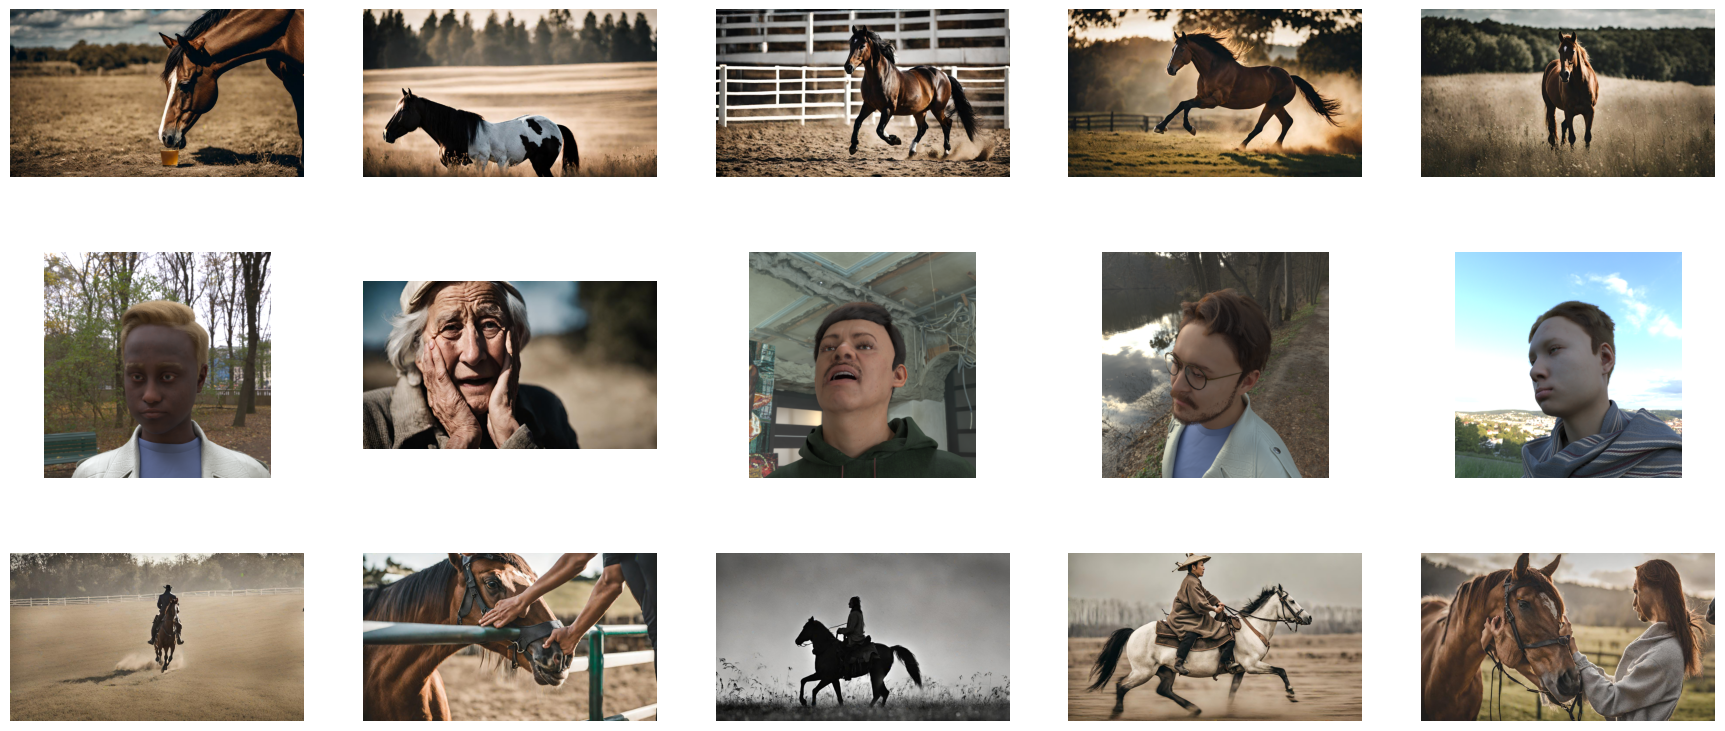

In [7]:
# Randomly show 5 images from the training directories of human, horses and.
fig, axes = plt.subplots(3, 5, figsize=(22,10))
dir_path_horses = 'train/train-horse/'
dir_path_humans = 'train/train-person/'
dir_path_both = 'train/train-both/'

random_indices = random.sample(range(50), 5)

for i, idx in enumerate(random_indices):
    img_path_horses = dir_path_horses + train_horse_dir[idx]
    img_horses = mpimg.imread(img_path_horses)
    axes[0, i].imshow(img_horses)
    axes[0, i].axis('off')

random_indices = random.sample(range(103), 5)

for i, idx in enumerate(random_indices):
    img_path_humans = dir_path_humans + train_human_dir[idx]
    img_humans = mpimg.imread(img_path_humans)
    axes[1, i].imshow(img_humans)
    axes[1, i].axis('off')

random_indices = random.sample(range(117), 5)

for i, idx in enumerate(random_indices):
    img_path_both = dir_path_both + train_both_dir[idx]
    img_both = mpimg.imread(img_path_both)
    axes[2, i].imshow(img_both)
    axes[2, i].axis('off')

In [8]:
# Create out base model.
model = models.Sequential([
    # First convolution
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    # Second convolution
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Third convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Forth convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten the results
    layers.Flatten(),
    # Hidden layer
    layers.Dense(512, activation='relu'),
    # Output layer
    layers.Dense(3, activation='softmax')
])

In [9]:
# Set the training parameters.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [11]:
# Add our data-augmentation parameters to ImageDataGenerator.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data will not be augmented.
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Flow training images in batches of 32 using train_datagen generator.
train_generator = train_datagen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size= 32,
    class_mode='categorical'
)

# Flow validation images using test_datagen generator.
val_generator = val_datagen.flow_from_directory(
    './val',
    target_size=(150, 150),
    class_mode='categorical'
)

Found 1270 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


In [14]:
# Train the model.
history = model.fit(train_generator, steps_per_epoch=35, epochs=20, verbose=1, validation_data=val_generator)

Epoch 1/20
35/35 [==============================] - 37s 1s/step - loss: 0.2567 - accuracy: 0.8874 - val_loss: 0.8944 - val_accuracy: 0.6290
Epoch 2/20
35/35 [==============================] - 35s 983ms/step - loss: 0.2083 - accuracy: 0.9189 - val_loss: 0.8860 - val_accuracy: 0.6290
Epoch 3/20
35/35 [==============================] - 35s 978ms/step - loss: 0.1894 - accuracy: 0.9243 - val_loss: 0.7855 - val_accuracy: 0.6613
Epoch 4/20
35/35 [==============================] - 36s 1s/step - loss: 0.2009 - accuracy: 0.9216 - val_loss: 0.7372 - val_accuracy: 0.6452
Epoch 5/20
35/35 [==============================] - 34s 964ms/step - loss: 0.1813 - accuracy: 0.9277 - val_loss: 0.5780 - val_accuracy: 0.8226
Epoch 6/20
35/35 [==============================] - 35s 966ms/step - loss: 0.2343 - accuracy: 0.9180 - val_loss: 0.7952 - val_accuracy: 0.5968
Epoch 7/20
35/35 [==============================] - 38s 1s/step - loss: 0.2080 - accuracy: 0.9161 - val_loss: 0.8288 - val_accuracy: 0.7258
Epoch 8/

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

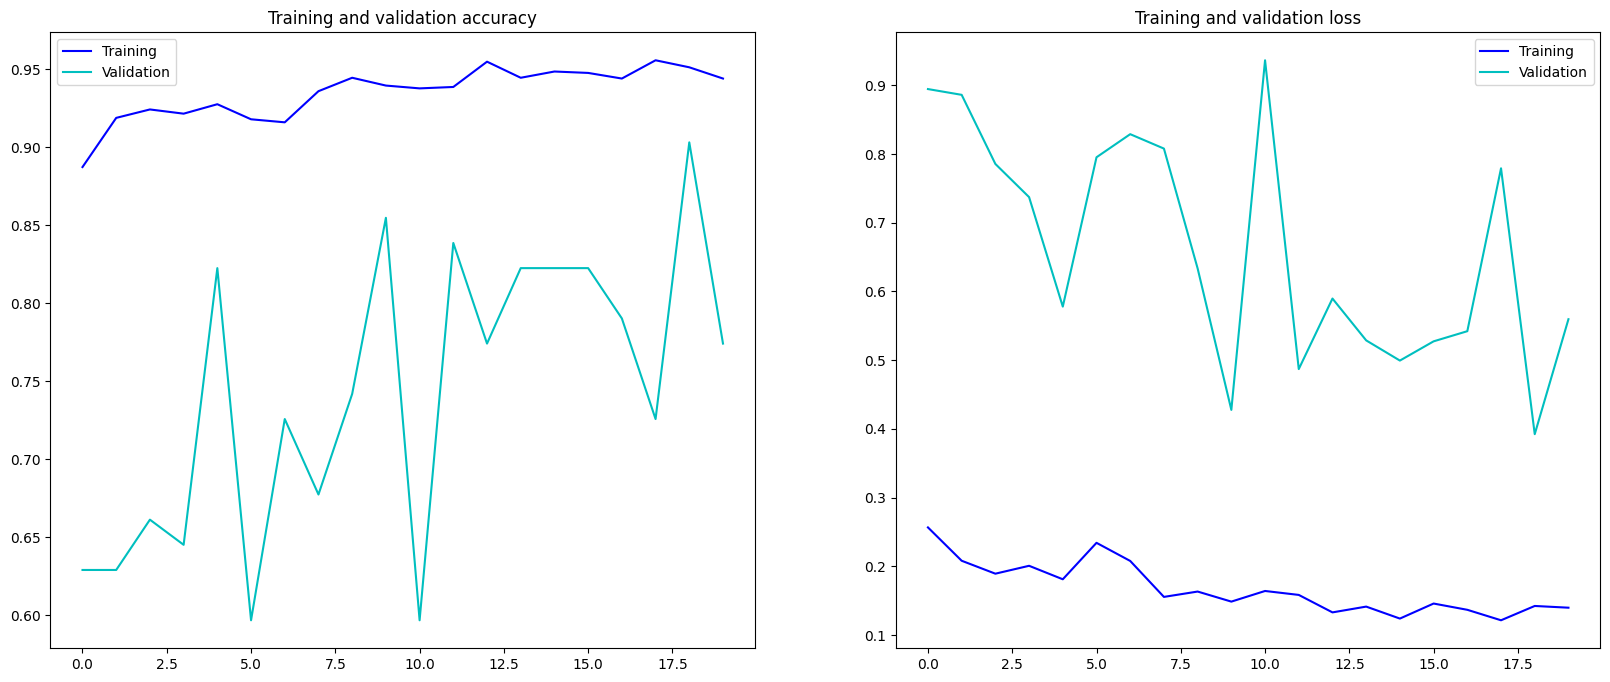

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].plot(epochs, acc, 'b', label='Training')
axes[0].plot(epochs, val_acc, 'c', label='Validation')
axes[0].set_title ('Training and validation accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Training')
axes[1].plot(epochs, val_loss, 'c', label='Validation')
axes[1].set_title('Training and validation loss')
axes[1].legend()

Making use of tansfer learning through the Inception CNN architecture

In [17]:
# Download the pre-trained weights.
local_weights_url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

local_weights_file = pywget.download(local_weights_url, out='')

In [18]:
# Check if the downloaded file contains weights.
with h5py.File(local_weights_file, 'r') as f:
    if len(f.keys()) > 0:
        print("The file contains weights.")
    else:
        print("The file does not contain any weights.")

The file contains weights.


In [19]:
# Initialize the base model by setting the input shape and removing the dense layers.
pre_trained_model = InceptionV3(include_top=False, weights=None, input_shape=(150, 150, 3))

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [20]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [21]:
# Choose 'mixed7' as the last layer of our base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)

last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [22]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)

# Append the dense network to the base model
model2 = Model(inputs=pre_trained_model.input, outputs=x)

# Print the model summary. See your dense network connected at the end.
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

In [23]:
# Set the training parameters
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model2.fit(train_generator, steps_per_epoch=35, epochs=30, verbose=1, validation_data=val_generator)

Epoch 1/30
35/35 [==============================] - 79s 2s/step - loss: 0.3560 - accuracy: 0.9225 - val_loss: 0.5484 - val_accuracy: 0.7903
Epoch 2/30
35/35 [==============================] - 78s 2s/step - loss: 0.1394 - accuracy: 0.9541 - val_loss: 0.9593 - val_accuracy: 0.7258
Epoch 3/30
35/35 [==============================] - 77s 2s/step - loss: 0.1305 - accuracy: 0.9541 - val_loss: 0.3362 - val_accuracy: 0.8548
Epoch 4/30
35/35 [==============================] - 79s 2s/step - loss: 0.0798 - accuracy: 0.9649 - val_loss: 0.3905 - val_accuracy: 0.8387
Epoch 5/30
35/35 [==============================] - 78s 2s/step - loss: 0.1018 - accuracy: 0.9658 - val_loss: 0.4030 - val_accuracy: 0.8871
Epoch 6/30
35/35 [==============================] - 78s 2s/step - loss: 0.0878 - accuracy: 0.9640 - val_loss: 0.2869 - val_accuracy: 0.9032
Epoch 7/30
35/35 [==============================] - 76s 2s/step - loss: 0.0517 - accuracy: 0.9784 - val_loss: 0.3231 - val_accuracy: 0.8871
Epoch 8/30
35/35 [==

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

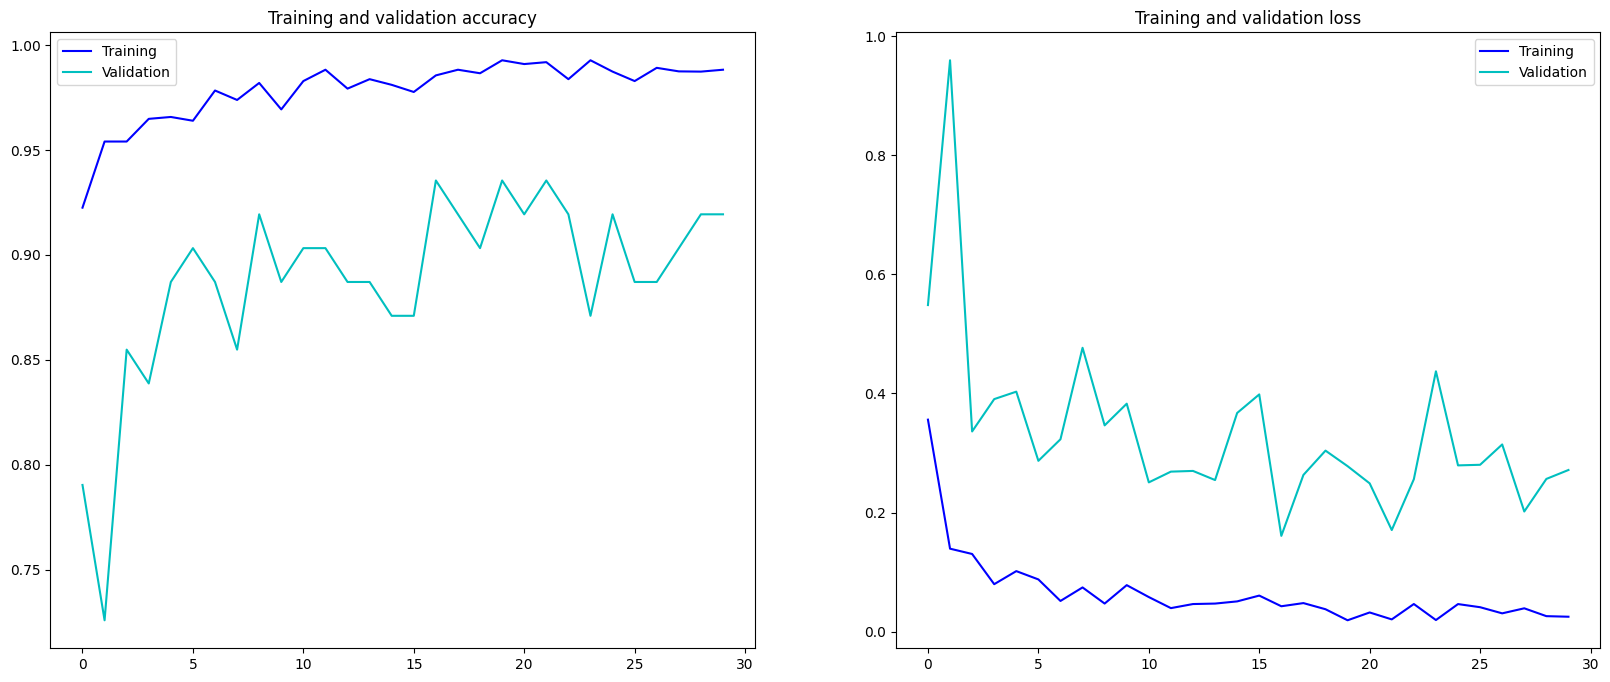

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].plot(epochs, acc, 'b', label='Training')
axes[0].plot(epochs, val_acc, 'c', label='Validation')
axes[0].set_title ('Training and validation accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Training')
axes[1].plot(epochs, val_loss, 'c', label='Validation')
axes[1].set_title('Training and validation loss')
axes[1].legend()

Model Evaluation

In [29]:
class_indices = train_generator.class_indices
print("Class indices:", class_indices)

# Invert the mapping to get the labels to indices
labels_to_indices = {v: k for k, v in class_indices.items()}

# Sort the labels based on their indices
sorted_labels = [labels_to_indices[i] for i in range(len(class_indices))]

print("Sorted labels:", sorted_labels)

Class indices: {'train-both': 0, 'train-horse': 1, 'train-person': 2}
Sorted labels: ['train-both', 'train-horse', 'train-person']


In [37]:
uploaded = files.upload()

labels = ['both', 'horse', 'human']

for path in uploaded.keys():
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  images = np.expand_dims(x, axis=0)

  classes = model2.predict(images)

  predicted_class_index = np.argmax(classes)

  # Get the label corresponding to the predicted class
  predicted_label = labels[predicted_class_index]

  print("Predicted label:", predicted_label)

Saving Both1.jpeg to Both1 (2).jpeg
Saving Both2.jpeg to Both2 (2).jpeg
Saving Both3.jpeg to Both3 (2).jpeg
Saving Both4.jpeg to Both4 (2).jpeg
Saving Both5.jpeg to Both5 (2).jpeg
Saving Horse1.jpeg to Horse1 (1).jpeg
Saving Horse2.jpeg to Horse2 (1).jpeg
Saving Horse3.jpeg to Horse3 (1).jpeg
Saving Human1.jpeg to Human1 (2).jpeg
Saving Human2.jpeg to Human2 (2).jpeg
Saving Human3.jpg to Human3 (2).jpg
Saving Human4.jpg to Human4 (2).jpg
Saving Human5.jpg to Human5.jpg
Saving Human6.jpeg to Human6.jpeg
1/1 [==============================] - 0s 78ms/step
Predicted label: both
1/1 [==============================] - 0s 75ms/step
Predicted label: both
1/1 [==============================] - 0s 79ms/step
Predicted label: both
1/1 [==============================] - 0s 71ms/step
Predicted label: both
1/1 [==============================] - 0s 71ms/step
Predicted label: both
1/1 [==============================] - 0s 73ms/step
Predicted label: horse
1/1 [==============================] - 0s 76ms/

Saving the entire model and weights

In [38]:
model2.save("entire_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
model.save_weights("model_weights.h5")